In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Logistic Regression Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Enable the Matplotlib property to allow diagrams to display in Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_feature = pd.read_csv(
    Path("../Data/Feature_Engineering_NA.csv"), 
    index_col="Date"
)

# Review the DataFrame
display(df_feature.head())
display(df_feature.columns)

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,44.150002,44.195000,43.759998,44.154999,30.764410,1300800,43.977499,44.152500,44.06500,0.908044,...,1,-0.002606,44.055333,0.000485,43.836333,-0.010636,43.964000,0.003576,43.617333,0.0
2014-01-03 00:00:00-05:00,44.174999,44.195000,43.799999,44.125000,30.743500,713800,43.997499,44.150000,44.07375,0.822786,...,1,0.010606,43.972666,0.012909,43.759999,0.013439,43.820833,0.015212,43.547333,1.0
2014-01-06 00:00:00-05:00,44.084999,44.084999,43.535000,43.630001,30.398621,1329400,43.809999,43.857500,43.83375,0.172730,...,1,0.041939,43.821333,0.042909,43.613000,0.045333,43.647167,0.043879,43.404667,1.0
2014-01-07 00:00:00-05:00,43.740002,43.849998,43.505001,43.514999,30.318489,916600,43.677500,43.627501,43.65250,0.028981,...,1,0.086576,43.650332,0.080727,43.483000,0.080833,43.525666,0.074879,43.315667,1.0
2014-01-08 00:00:00-05:00,43.584999,43.674999,43.325001,43.540001,30.335909,889000,43.500000,43.562500,43.53125,0.614289,...,1,0.121788,43.582666,0.110076,43.430833,0.096970,43.542666,0.098364,43.279000,1.0


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl',
       'Mid_oc', 'Mid_hloc', 'Close_in_range', 'Returns_1Day_Moc',
       'Returns_5Day_Moc', 'Returns_30Day_Moc', 'Returns_1Day_Mhloc',
       'Returns_5Day_Mhloc', 'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc',
       'Std_Dev_30Day_Moc', 'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc',
       'SMA_Returns_8Day_Mhloc', 'SMA_Returns_20Day_Mhloc',
       'SMA_Delta_8_20Day_Mhloc', 'SMA_Signal_8_20Day_Mhloc', 'high_slope',
       'high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope',
       'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day'],
      dtype='object')

In [4]:
df_feature_1 = df_feature
drop_colums_feature = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl', 'Mid_oc', 'Mid_hloc',
                        'high_slope','high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope', 'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day']
df_feature_1 = df_feature_1.dropna()
df_feature_1 = df_feature_1.drop(columns = drop_colums_feature)

# Review the DataFrame
print(f"Shape: {df_feature_1.shape}")
print(f"Columns/Features: {df_feature_1.columns}")
display(df_feature_1.head(10))
display(df_feature_1.tail(10))

Shape: (2218, 15)
Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,1.000000,0.007800,0.020453,-0.019704,0.006603,0.018094,-0.018382,0.509401,0.928226,0.532940,0.930355,0.004479,0.007560,-0.003080,0
2014-02-14 00:00:00-05:00,0.490568,0.015306,0.031149,-0.004643,0.014449,0.029987,-0.004396,0.672975,0.922342,0.671787,0.925222,0.005792,0.008353,-0.002561,0
2014-02-18 00:00:00-05:00,0.032607,-0.001820,0.034491,0.000171,-0.000399,0.034188,0.000656,0.705265,0.922507,0.693122,0.925851,0.006431,0.008025,-0.001594,0
2014-02-19 00:00:00-05:00,0.599998,-0.001938,0.029149,0.003495,-0.002565,0.027478,0.002234,0.680117,0.924938,0.662194,0.927439,0.006819,0.008001,-0.001182,0
2014-02-20 00:00:00-05:00,0.576918,0.002398,0.021829,0.007403,0.002457,0.020624,0.007495,0.657465,0.930201,0.628113,0.932566,0.006832,0.008028,-0.001196,0
2014-02-21 00:00:00-05:00,0.076920,-0.004671,0.009184,-0.003309,-0.004218,0.009652,-0.002512,0.616932,0.927699,0.596759,0.930721,0.006765,0.007873,-0.001109,0
2014-02-24 00:00:00-05:00,0.610170,0.000000,-0.006030,-0.008850,-0.001374,-0.006096,-0.009088,0.577624,0.919015,0.552348,0.922580,0.006894,0.007369,-0.000475,0
2014-02-25 00:00:00-05:00,0.868418,0.008700,0.004445,0.000681,0.009000,0.003249,-0.000057,0.490602,0.919884,0.463038,0.922511,0.006787,0.006722,0.000065,0
2014-02-26 00:00:00-05:00,0.333333,0.003858,0.010279,0.007460,0.005852,0.011714,0.008143,0.375224,0.929502,0.369895,0.933390,0.006546,0.006372,0.000174,0


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2022-12-01 00:00:00-05:00,0.415494,0.001044,-0.031810,0.088561,0.003898,-0.032013,0.089126,1.168297,3.054213,1.221459,3.041160,0.009634,0.009291,0.000343,0
2022-12-02 00:00:00-05:00,0.675443,-0.004381,-0.036684,0.079747,-0.004013,-0.036506,0.081164,1.366502,2.805944,1.400085,2.787957,0.008841,0.008621,0.000220,0
2022-12-05 00:00:00-05:00,0.213018,-0.004400,-0.029017,0.059949,-0.005940,-0.030249,0.057746,1.575968,2.615740,1.617405,2.604711,0.007864,0.008217,-0.000353,0
2022-12-06 00:00:00-05:00,0.884055,-0.005524,-0.033294,0.048480,-0.007634,-0.035781,0.045219,1.764630,2.438842,1.842061,2.432249,0.007251,0.008199,-0.000948,0
2022-12-07 00:00:00-05:00,0.057972,-0.003068,-0.016236,0.037665,0.001538,-0.012140,0.039736,1.821889,2.293731,1.868205,2.282533,0.006888,0.008222,-0.001334,0
2022-12-08 00:00:00-05:00,0.111112,-0.002972,-0.020183,0.031741,-0.004105,-0.020015,0.031802,1.734755,2.157991,1.759288,2.148219,0.006504,0.007205,-0.000701,0
2022-12-09 00:00:00-05:00,0.971222,0.004152,-0.011786,0.031211,0.003298,-0.012822,0.030229,1.399266,2.030111,1.408441,2.024842,0.007195,0.007215,-0.000020,0
2022-12-12 00:00:00-05:00,0.930439,0.005036,-0.002420,0.026028,0.002518,-0.004422,0.022133,1.124788,1.942101,1.126817,1.947335,0.004109,0.007301,-0.003192,0
2022-12-13 00:00:00-05:00,0.240742,-0.000316,0.002804,0.016027,0.001454,0.004695,0.015633,0.659993,1.895140,0.651276,1.900147,0.004028,0.007219,-0.003192,0


In [5]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_target = pd.read_csv(
    Path("../Data/Feature_Engineering_RY.csv"), 
    index_col="Date"
)

# Review the DataFrame
df_target.head()

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,71.300003,71.639999,70.779999,71.589996,49.878262,1576100,71.209999,71.445000,71.327499,0.941857,...,1,-0.020970,71.529333,-0.000273,71.150000,-0.015939,71.263666,0.020424,70.770666,0.0
2014-01-03 00:00:00-05:00,71.370003,71.459999,71.110001,71.389999,49.738911,1243400,71.285000,71.380001,71.332500,0.800000,...,1,-0.008849,71.434667,0.002273,71.127000,0.002758,71.135333,0.013394,70.819334,1.0
2014-01-06 00:00:00-05:00,71.449997,71.500000,70.610001,70.699997,49.258179,2737700,71.055000,71.074997,71.064999,0.101120,...,1,0.031758,71.269334,0.036273,70.970001,0.037121,70.958332,0.040788,70.670668,1.0
2014-01-07 00:00:00-05:00,71.000000,71.440002,70.970001,70.970001,49.446289,1374100,71.205002,70.985001,71.095001,0.000000,...,1,0.112727,70.960001,0.093576,70.785334,0.096606,70.759667,0.074424,70.610667,1.0
2014-01-08 00:00:00-05:00,70.959999,71.180000,70.669998,71.000000,49.467197,1293700,70.924999,70.980000,70.952499,0.647060,...,1,0.199939,70.671333,0.184333,70.473667,0.166152,70.572666,0.168727,70.276000,1.0


In [6]:
df_target_1 = df_target[['trend_10day']]

# Review the DataFrame
print(f"Shape: {df_target_1.shape}")
print(f"Columns/Features: {df_target_1.columns}")
display(df_target_1.head(10))
display(df_target_1.tail(10))

Shape: (2258, 1)
Columns/Features: Index(['trend_10day'], dtype='object')


,trend_10day
Date,
2014-01-02 00:00:00-05:00,0.0
2014-01-03 00:00:00-05:00,1.0
2014-01-06 00:00:00-05:00,1.0
2014-01-07 00:00:00-05:00,1.0
2014-01-08 00:00:00-05:00,1.0
2014-01-09 00:00:00-05:00,1.0
2014-01-10 00:00:00-05:00,1.0
2014-01-13 00:00:00-05:00,1.0
2014-01-14 00:00:00-05:00,0.0


,trend_10day
Date,
2022-12-15 00:00:00-05:00,NaN
2022-12-16 00:00:00-05:00,NaN
2022-12-19 00:00:00-05:00,NaN
2022-12-20 00:00:00-05:00,NaN
2022-12-21 00:00:00-05:00,NaN
2022-12-22 00:00:00-05:00,NaN
2022-12-23 00:00:00-05:00,NaN
2022-12-28 00:00:00-05:00,NaN
2022-12-29 00:00:00-05:00,NaN


In [7]:
df_model = pd.concat([df_feature_1, df_target_1], axis="columns", join="inner")

# Review the DataFrame
print(f"Shape: {df_model.shape}")
print(f"Columns/Features: {df_model.columns}")
display(df_model.head(10))
display(df_model.tail(10))

Shape: (2218, 16)
Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc', 'trend_10day'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc,trend_10day
Date,,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,1.000000,0.007800,0.020453,-0.019704,0.006603,0.018094,-0.018382,0.509401,0.928226,0.532940,0.930355,0.004479,0.007560,-0.003080,0,1.0
2014-02-14 00:00:00-05:00,0.490568,0.015306,0.031149,-0.004643,0.014449,0.029987,-0.004396,0.672975,0.922342,0.671787,0.925222,0.005792,0.008353,-0.002561,0,1.0
2014-02-18 00:00:00-05:00,0.032607,-0.001820,0.034491,0.000171,-0.000399,0.034188,0.000656,0.705265,0.922507,0.693122,0.925851,0.006431,0.008025,-0.001594,0,1.0
2014-02-19 00:00:00-05:00,0.599998,-0.001938,0.029149,0.003495,-0.002565,0.027478,0.002234,0.680117,0.924938,0.662194,0.927439,0.006819,0.008001,-0.001182,0,0.0
2014-02-20 00:00:00-05:00,0.576918,0.002398,0.021829,0.007403,0.002457,0.020624,0.007495,0.657465,0.930201,0.628113,0.932566,0.006832,0.008028,-0.001196,0,0.0
2014-02-21 00:00:00-05:00,0.076920,-0.004671,0.009184,-0.003309,-0.004218,0.009652,-0.002512,0.616932,0.927699,0.596759,0.930721,0.006765,0.007873,-0.001109,0,0.0
2014-02-24 00:00:00-05:00,0.610170,0.000000,-0.006030,-0.008850,-0.001374,-0.006096,-0.009088,0.577624,0.919015,0.552348,0.922580,0.006894,0.007369,-0.000475,0,0.0
2014-02-25 00:00:00-05:00,0.868418,0.008700,0.004445,0.000681,0.009000,0.003249,-0.000057,0.490602,0.919884,0.463038,0.922511,0.006787,0.006722,0.000065,0,0.0
2014-02-26 00:00:00-05:00,0.333333,0.003858,0.010279,0.007460,0.005852,0.011714,0.008143,0.375224,0.929502,0.369895,0.933390,0.006546,0.006372,0.000174,0,0.0


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc,trend_10day
Date,,,,,,,,,,,,,,,,
2022-12-01 00:00:00-05:00,0.415494,0.001044,-0.031810,0.088561,0.003898,-0.032013,0.089126,1.168297,3.054213,1.221459,3.041160,0.009634,0.009291,0.000343,0,0.0
2022-12-02 00:00:00-05:00,0.675443,-0.004381,-0.036684,0.079747,-0.004013,-0.036506,0.081164,1.366502,2.805944,1.400085,2.787957,0.008841,0.008621,0.000220,0,0.0
2022-12-05 00:00:00-05:00,0.213018,-0.004400,-0.029017,0.059949,-0.005940,-0.030249,0.057746,1.575968,2.615740,1.617405,2.604711,0.007864,0.008217,-0.000353,0,0.0
2022-12-06 00:00:00-05:00,0.884055,-0.005524,-0.033294,0.048480,-0.007634,-0.035781,0.045219,1.764630,2.438842,1.842061,2.432249,0.007251,0.008199,-0.000948,0,0.0
2022-12-07 00:00:00-05:00,0.057972,-0.003068,-0.016236,0.037665,0.001538,-0.012140,0.039736,1.821889,2.293731,1.868205,2.282533,0.006888,0.008222,-0.001334,0,0.0
2022-12-08 00:00:00-05:00,0.111112,-0.002972,-0.020183,0.031741,-0.004105,-0.020015,0.031802,1.734755,2.157991,1.759288,2.148219,0.006504,0.007205,-0.000701,0,0.0
2022-12-09 00:00:00-05:00,0.971222,0.004152,-0.011786,0.031211,0.003298,-0.012822,0.030229,1.399266,2.030111,1.408441,2.024842,0.007195,0.007215,-0.000020,0,0.0
2022-12-12 00:00:00-05:00,0.930439,0.005036,-0.002420,0.026028,0.002518,-0.004422,0.022133,1.124788,1.942101,1.126817,1.947335,0.004109,0.007301,-0.003192,0,0.0
2022-12-13 00:00:00-05:00,0.240742,-0.000316,0.002804,0.016027,0.001454,0.004695,0.015633,0.659993,1.895140,0.651276,1.900147,0.004028,0.007219,-0.003192,0,0.0


In [8]:
# Train Test Split
df_model = df_model.dropna()

# Train 2014 through 2017
df_train = df_model.loc['2014-01-01':'2017-12-31']

# Test 2018
df_test = df_model.loc['2018-01-01':'2018-12-31']


In [9]:
# Training: Set X and Y variables for model
Y_Train = df_train[['trend_10day']]
X_Train = df_train.drop(columns = ['trend_10day'])

# Review training data
print(f"df_train X - Shape: {X_Train.shape} Columns/Features: {X_Train.columns}")
print(f"df_train y - Shape: {Y_Train.shape} Columns/Features: {Y_Train.columns}")
display(X_Train.head(5))
display(Y_Train.head(5))

df_train X - Shape: (973, 15) Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')
df_train y - Shape: (973, 1) Columns/Features: Index(['trend_10day'], dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,1.000000,0.007800,0.020453,-0.019704,0.006603,0.018094,-0.018382,0.509401,0.928226,0.532940,0.930355,0.004479,0.007560,-0.003080,0
2014-02-14 00:00:00-05:00,0.490568,0.015306,0.031149,-0.004643,0.014449,0.029987,-0.004396,0.672975,0.922342,0.671787,0.925222,0.005792,0.008353,-0.002561,0
2014-02-18 00:00:00-05:00,0.032607,-0.001820,0.034491,0.000171,-0.000399,0.034188,0.000656,0.705265,0.922507,0.693122,0.925851,0.006431,0.008025,-0.001594,0
2014-02-19 00:00:00-05:00,0.599998,-0.001938,0.029149,0.003495,-0.002565,0.027478,0.002234,0.680117,0.924938,0.662194,0.927439,0.006819,0.008001,-0.001182,0
2014-02-20 00:00:00-05:00,0.576918,0.002398,0.021829,0.007403,0.002457,0.020624,0.007495,0.657465,0.930201,0.628113,0.932566,0.006832,0.008028,-0.001196,0


,trend_10day
Date,
2014-02-13 00:00:00-05:00,1.0
2014-02-14 00:00:00-05:00,1.0
2014-02-18 00:00:00-05:00,1.0
2014-02-19 00:00:00-05:00,0.0
2014-02-20 00:00:00-05:00,0.0


In [10]:
# Training: Set X and Y variables for model
Y_Test = df_test[['trend_10day']]
X_Test = df_test.drop(columns = ['trend_10day'])

# Review training data
print(f"df_train X - Shape: {X_Test.shape} Columns/Features: {X_Test.columns}")
print(f"df_train Y - Shape: {Y_Test.shape} Columns/Features: {Y_Test.columns}")
display(X_Test.head(5))
display(Y_Test.head(5))

df_train X - Shape: (250, 15) Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')
df_train Y - Shape: (250, 1) Columns/Features: Index(['trend_10day'], dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,0.320512,-0.002636,-0.012653,-0.013667,-0.000160,-0.011818,-0.012911,0.689320,0.539655,0.709274,0.547954,0.004541,0.004209,0.000332,0
2018-01-03 00:00:00-05:00,0.749995,-0.001041,-0.002400,-0.016791,-0.001880,-0.001441,-0.017133,0.653832,0.575533,0.671326,0.582586,0.004549,0.004156,0.000393,0
2018-01-04 00:00:00-05:00,0.738459,0.009140,0.011086,-0.010846,0.009417,0.010673,-0.011498,0.525181,0.581006,0.538764,0.586118,0.006137,0.004752,0.001385,0
2018-01-05 00:00:00-05:00,0.666667,0.008502,0.017801,-0.006574,0.008178,0.018734,-0.006105,0.479941,0.573845,0.483201,0.579641,0.006825,0.005063,0.001763,0
2018-01-08 00:00:00-05:00,0.571432,-0.000551,0.013421,0.000710,-0.001024,0.014557,0.000828,0.470060,0.573910,0.471530,0.579641,0.004977,0.005002,-0.000025,0


,trend_10day
Date,
2018-01-02 00:00:00-05:00,1.0
2018-01-03 00:00:00-05:00,1.0
2018-01-04 00:00:00-05:00,1.0
2018-01-05 00:00:00-05:00,1.0
2018-01-08 00:00:00-05:00,1.0


In [11]:
# Convert Y variables from Dataframe to Series

Y_Test = Y_Test['trend_10day']
Y_Train = Y_Train['trend_10day']


In [12]:
# Create Model
classifier = lr(solver='lbfgs', random_state = 1)
classifier.fit(X_Train, Y_Train)
predictions_train=classifier.predict(X_Train)
predictions_test=classifier.predict(X_Test)

# Add predictions to Datadrame            
df_prediction_train = pd.DataFrame({"prediction":predictions_train,"actual":Y_Train} )
df_prediction_test = pd.DataFrame({"prediction":predictions_test,"actual":Y_Test} )

# Logistic Regression reports
Test_Report = classification_report_imbalanced(Y_Test,predictions_test)
Test_Matrix = confusion_matrix(Y_Test,predictions_test)
print(Test_Report) 
print(Test_Matrix) 

#sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)[source]¶
train_accuracy =  accuracy_score(df_prediction_train['actual'], df_prediction_train['prediction'])
test_accuracy =  accuracy_score(df_prediction_test['actual'], df_prediction_test['prediction'])

#sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source]
train_recall = recall_score(df_prediction_train['actual'], df_prediction_train['prediction'], average=None)
test_recall = recall_score(df_prediction_test['actual'], df_prediction_test['prediction'], average=None)

#sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source]            
train_precision = precision_score(df_prediction_train['actual'], df_prediction_train['prediction'], average=None)
test_precision = precision_score(df_prediction_test['actual'], df_prediction_test['prediction'], average=None)

df_performance = pd.DataFrame({"train_accuracy":train_accuracy, "train_reall_0":train_recall[0], "train_reall_1":train_recall[1], "train_precision_0":train_precision[0], "train_precision_1":train_precision[1]
                               , "test_accuracy":test_accuracy, "test_recall_0":test_recall[0], "test_recall_1":test_recall[1], "test_precision_0":test_precision[0], "test_precision_1":test_precision[1]}, index = ['RY'])

display(df_performance)

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.53      0.16      0.84      0.25      0.37      0.13       130
        1.0       0.48      0.84      0.16      0.61      0.37      0.15       120

avg / total       0.50      0.49      0.52      0.42      0.37      0.14       250

[[ 21 109]
 [ 19 101]]


,train_accuracy,train_reall_0,train_reall_1,train_precision_0,train_precision_1,test_accuracy,test_recall_0,test_recall_1,test_precision_0,test_precision_1
RY,0.580678,0.164251,0.889088,0.523077,0.589561,0.488,0.161538,0.841667,0.525,0.480952


In [13]:
df_prediction_test

,prediction,actual
Date,,
2018-01-02 00:00:00-05:00,1.0,1.0
2018-01-03 00:00:00-05:00,1.0,1.0
2018-01-04 00:00:00-05:00,1.0,1.0
2018-01-05 00:00:00-05:00,1.0,1.0
2018-01-08 00:00:00-05:00,1.0,1.0
...,...,...
2018-12-20 00:00:00-05:00,1.0,1.0
2018-12-21 00:00:00-05:00,1.0,1.0
2018-12-24 00:00:00-05:00,1.0,1.0


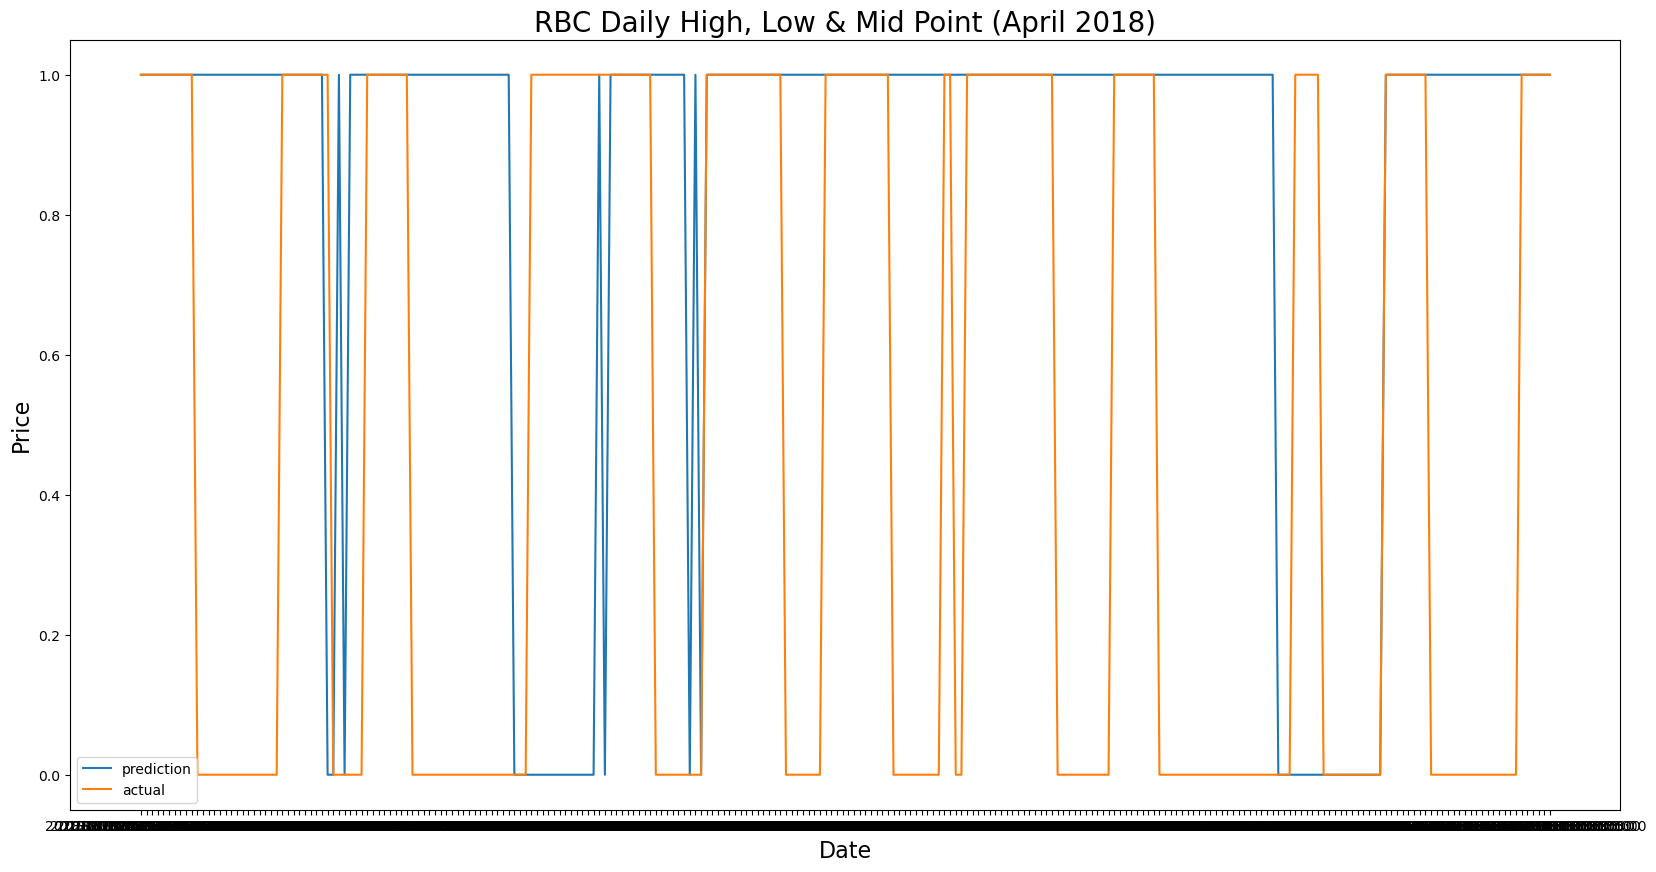

In [14]:
# Plot daily returns of all portfolios
fig = plt.figure(figsize=(20,10))

plt.plot(df_prediction_test)
plt.title("RBC Daily High, Low & Mid Point (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_prediction_test.columns)
#plt.grid()

plt.show()

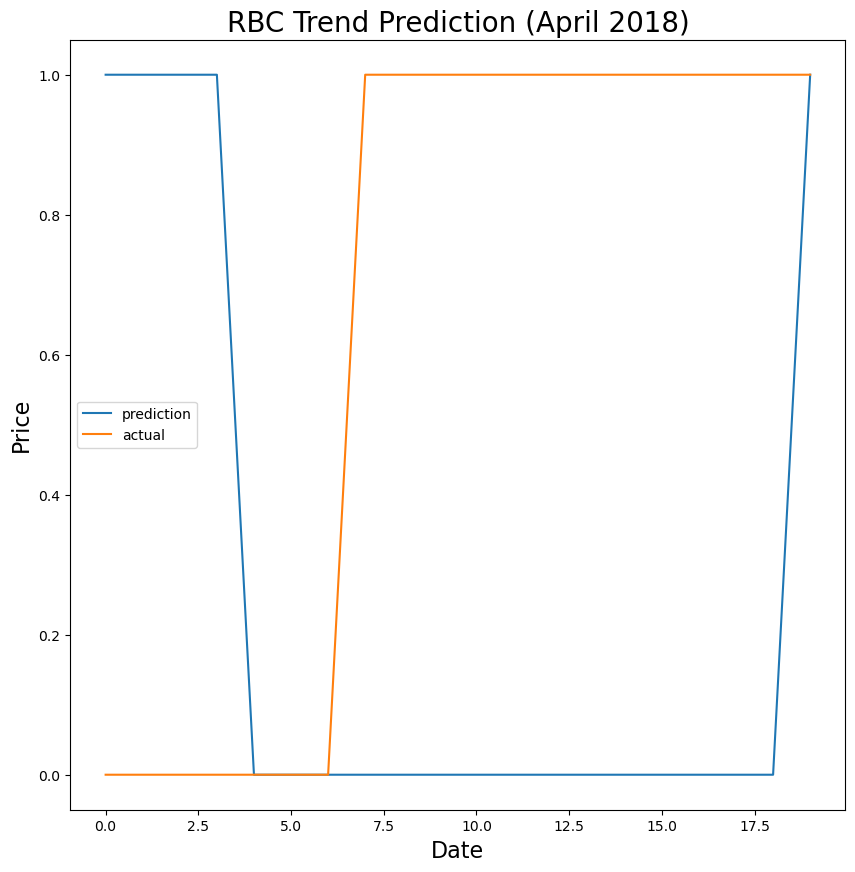

In [15]:
# Data April 2018
df_plt2 = df_prediction_test.loc['2018-04-01':'2018-04-30']
df_plt2 = df_plt2.reset_index()
df_plt2 = df_plt2.drop(columns = ['Date'])
df_plt2.columns

# Plot daily returns of all portfolios
fig = plt.figure(figsize=(10,10))

plt.plot(df_plt2)
plt.title("RBC Trend Prediction (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_plt2.columns)
#plt.grid()

plt.show()

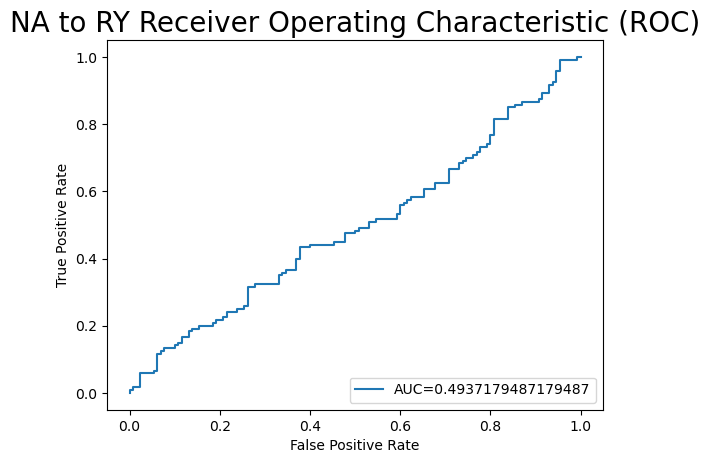

In [16]:
X_test = X_Test
y_test = Y_Test
y_pred_proba = predictions_test
log_regression = classifier

#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("NA to RY Receiver Operating Characteristic (ROC)", fontsize = 20)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()